In [2]:
#Here are some regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#to neglect warnings in the code
import warnings
warnings.filterwarnings('ignore')

#To make our plots appear in the notebook
%matplotlib inline

In [7]:
#models we are using here
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

#importing SVC from sklearn's module
from sklearn.svm import SVC

In [8]:
#model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve

In [10]:
#to load data
fetchdata = pd.read_csv("F:/FORGIT/AI PROJECT/stroke_data.csv") 
fetchdata.shape # (rows, columns)

(40910, 11)

In [12]:
#To replace null values in the data
fetchdata.fillna(-99999, inplace= True)

In [13]:
#data exploration
#automatically checks top 5 rows in the data
fetchdata.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [14]:
#checks top 20 dataframes from data list
fetchdata.head(20)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
5,1.0,55.0,1,1,1,4,0,70.09,27.4,0,1
6,0.0,82.0,0,0,0,4,1,94.39,22.8,0,1
7,0.0,17.0,1,0,1,4,0,80.43,29.7,0,1
8,1.0,31.0,0,1,1,2,0,120.46,36.8,1,1
9,0.0,55.0,0,0,1,4,1,104.51,27.3,1,1


# Checking number of positive (1) and negative (0) samples we have in our dataframe

In [15]:
fetchdata.stroke.value_counts()

stroke
1    20460
0    20450
Name: count, dtype: int64

Text(0.5, 1.0, 'Value Count')

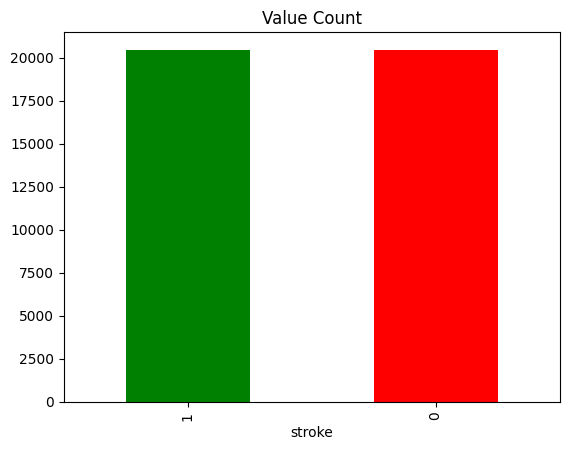

In [16]:
#Plotting counted values with bar graph
fetchdata.stroke.value_counts().plot(kind="bar", color=["green", "red"]);
plt.title("Value Count")

In [17]:
fetchdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40910 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


In [18]:
fetchdata.describe()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000,40910.000000
mean,-6.777976,51.327255,0.213835,0.127719,0.821340,3.461134,0.514886,122.075901,30.406355,0.488609,0.500122
std,856.314726,21.623969,0.410017,0.333781,0.383072,0.780919,0.499784,57.561531,6.835072,0.499876,0.500006
min,-99999.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


# Stroke frequency according to gender

In [19]:
fetchdata.sex.value_counts()

sex
 1.0        22710
 0.0        18197
-99999.0        3
Name: count, dtype: int64

In [20]:
# Compare target column with sex column
pd.crosstab(fetchdata.stroke, fetchdata.sex)

sex,-99999.0,0.0,1.0
stroke,,,
0,3,7967,12480
1,0,10230,10230


Text(0.5, 1.0, 'A plot')

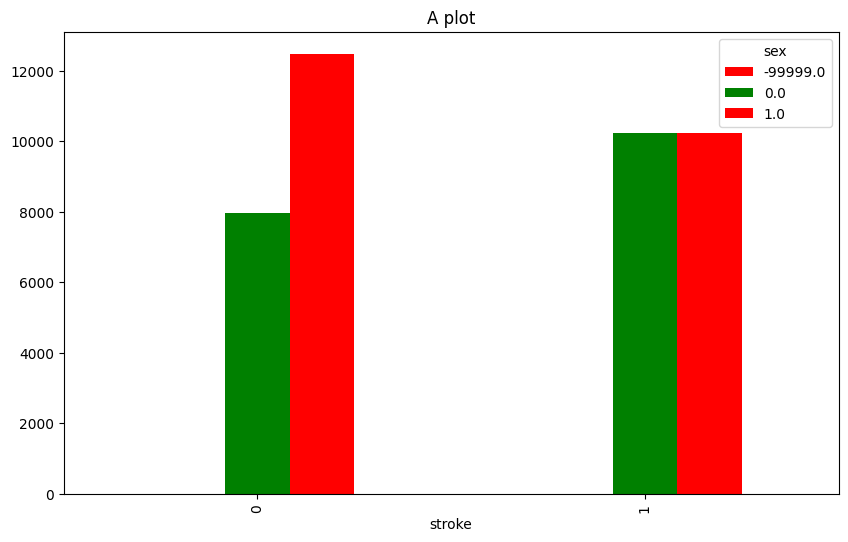

In [21]:
#creating a plot
pd.crosstab(fetchdata.stroke, fetchdata.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["red", "green"]);
plt.title("A plot")

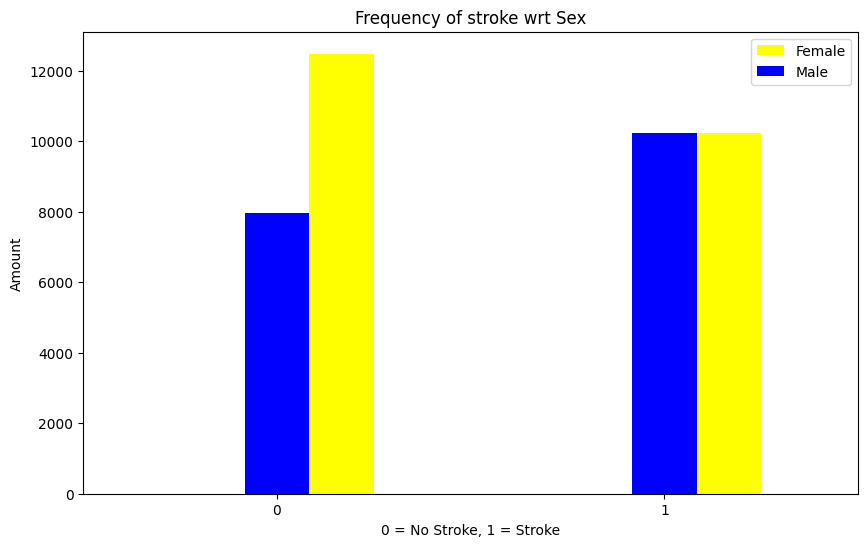

In [22]:
#creating a plot
pd.crosstab(fetchdata.stroke, fetchdata.sex).plot(kind="bar", figsize=(10,6), color=["yellow", "blue"])

# Add some attributes to it
plt.title("Frequency of stroke wrt Sex")
plt.xlabel("0 = No Stroke, 1 = Stroke")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # keep the labels on the x-axis vertical

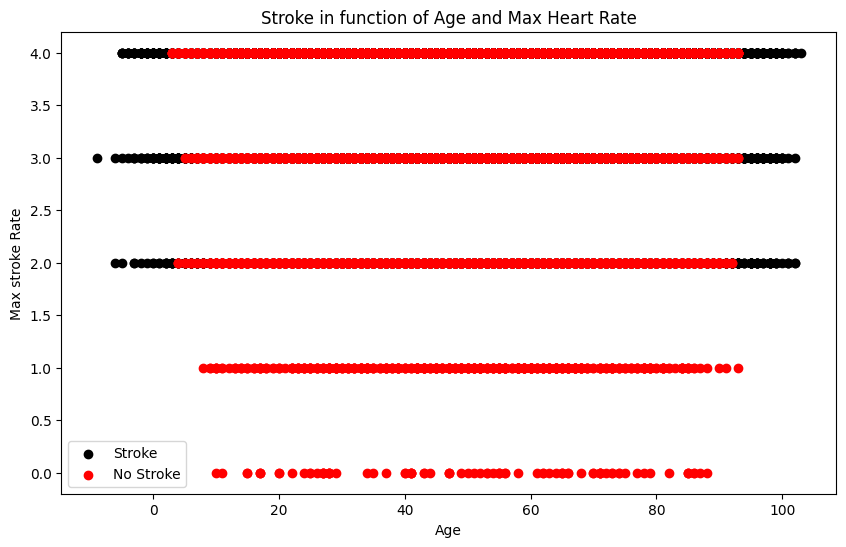

In [34]:
#to make another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(fetchdata.age[fetchdata.stroke==1], 
            fetchdata.work_type[fetchdata.stroke==1], 
            c="black") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(fetchdata.age[fetchdata.stroke==0], 
            fetchdata.work_type[fetchdata.stroke==0], 
            c="red") # axis always come as (x, y)

# Add some helpful info
plt.title("Stroke in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Stroke", "No Stroke"])
plt.ylabel("Max stroke Rate");

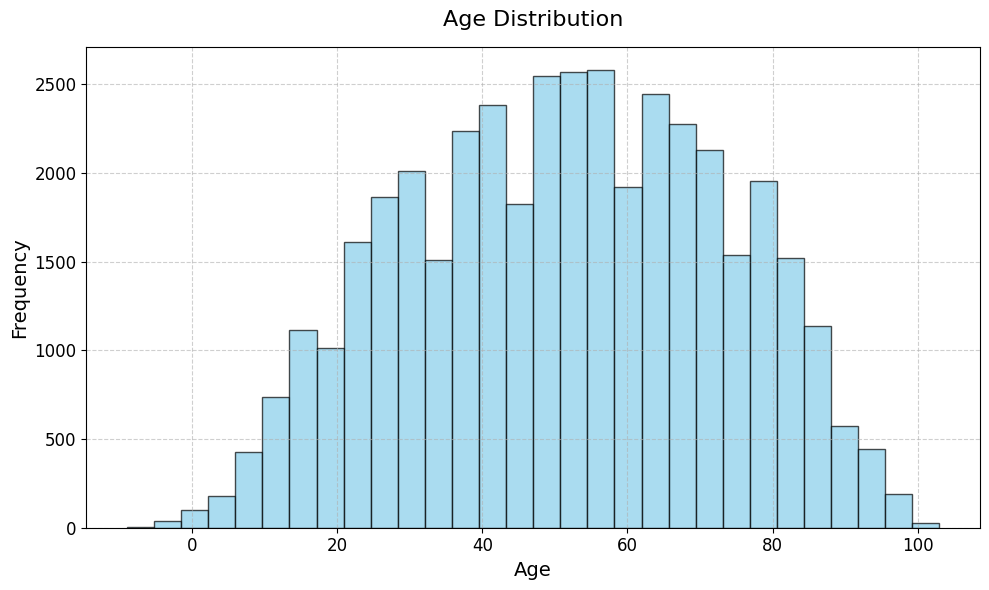

In [35]:
#to check variable distribution using histogram
# Plot histogram with improved aesthetics
plt.figure(figsize=(10, 6))
plt.hist(fetchdata['age'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('Age Distribution', fontsize=16, pad=15)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


In [36]:
#code to find correlation between independent variables
corr_matrix = fetchdata.corr()
corr_matrix 

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
sex,1.000000,0.000195,0.004444,0.003251,-0.004009,-0.005908,-0.008310,0.007642,0.002260,-0.008777,0.008501
age,0.000195,1.000000,0.014365,0.024541,0.006294,0.003647,0.002686,0.027271,-0.012323,-0.002070,0.058534
hypertension,0.004444,0.014365,1.000000,0.079968,0.033760,-0.033133,-0.002651,0.203502,0.082386,-0.017813,0.257182
heart_disease,0.003251,0.024541,0.079968,1.000000,0.071596,0.049382,0.013000,0.252034,0.021374,0.137279,0.223930
ever_married,-0.004009,0.006294,0.033760,0.071596,1.000000,0.051596,-0.057161,0.160268,0.113667,0.137516,0.181656
work_type,-0.005908,0.003647,-0.033133,0.049382,0.051596,1.000000,-0.011294,0.018167,0.074723,0.052938,0.026494
Residence_type,-0.008310,0.002686,-0.002651,0.013000,-0.057161,-0.011294,1.000000,0.016431,0.037169,0.017704,0.011682
avg_glucose_level,0.007642,0.027271,0.203502,0.252034,0.160268,0.018167,0.016431,1.000000,0.242823,0.056832,0.265452
bmi,0.002260,-0.012323,0.082386,0.021374,0.113667,0.074723,0.037169,0.242823,1.000000,0.042448,0.018326
smoking_status,-0.008777,-0.002070,-0.017813,0.137279,0.137516,0.052938,0.017704,0.056832,0.042448,1.000000,0.068368


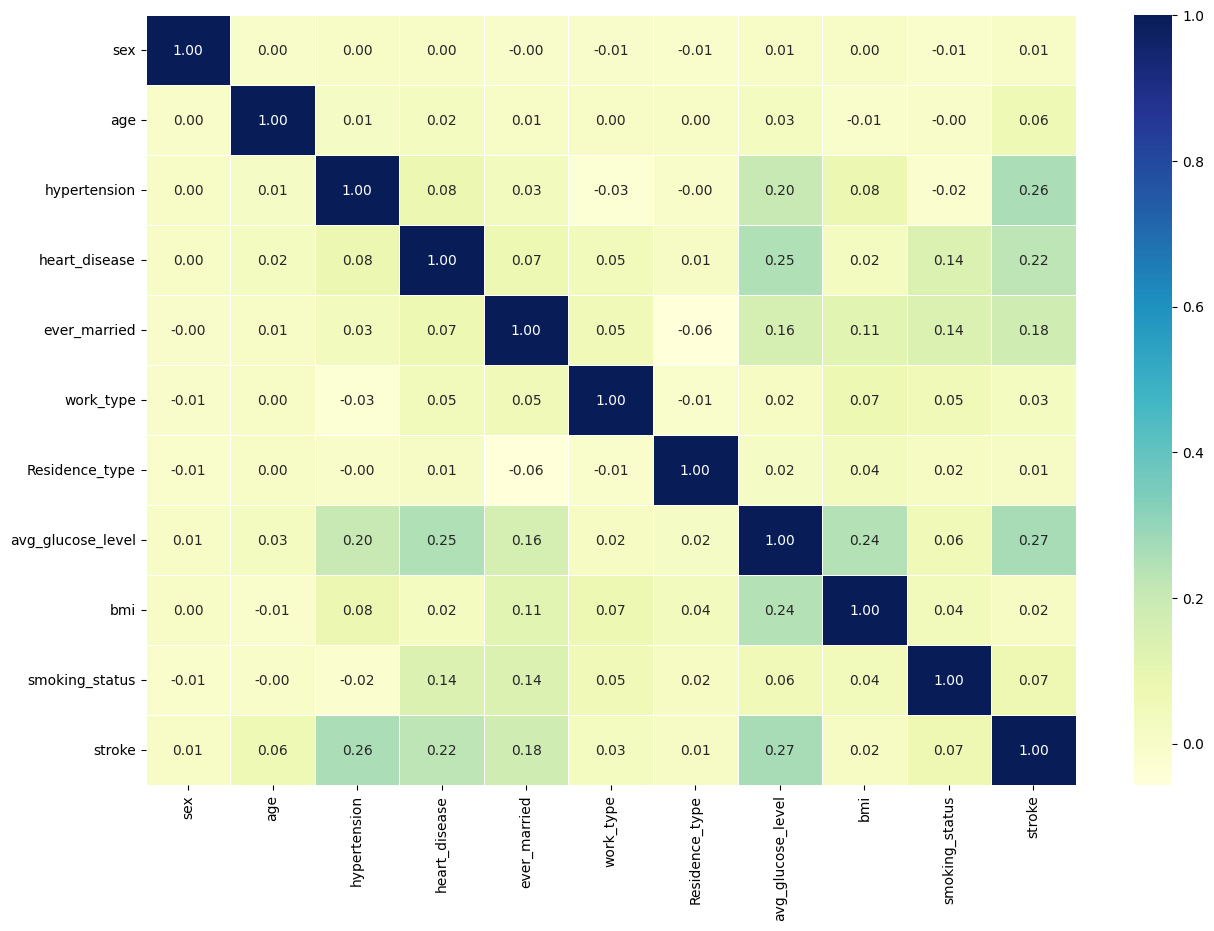

In [37]:
#to create correlation chart
corr_matrix = fetchdata.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [38]:
fetchdata.head(20)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1
5,1.0,55.0,1,1,1,4,0,70.09,27.4,0,1
6,0.0,82.0,0,0,0,4,1,94.39,22.8,0,1
7,0.0,17.0,1,0,1,4,0,80.43,29.7,0,1
8,1.0,31.0,0,1,1,2,0,120.46,36.8,1,1
9,0.0,55.0,0,0,1,4,1,104.51,27.3,1,1


In [39]:
fetchdata.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [40]:
fetchfata = fetchdata.dropna()

In [41]:
# Everything except target variable
X = fetchdata.drop("stroke", axis=1)

# Target variable
y = fetchdata.stroke.values

In [42]:
# Independent variables (no target column)
X.head(20)

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1
5,1.0,55.0,1,1,1,4,0,70.09,27.4,0
6,0.0,82.0,0,0,0,4,1,94.39,22.8,0
7,0.0,17.0,1,0,1,4,0,80.43,29.7,0
8,1.0,31.0,0,1,1,2,0,120.46,36.8,1
9,0.0,55.0,0,0,1,4,1,104.51,27.3,1


In [43]:
# Targets
y

array([1, 1, 1, ..., 0, 0, 0])

In [44]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [45]:
X_train.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
22724,0.0,38.0,0,0,0,4,0,123.83,23.8,0
28372,0.0,51.0,0,0,1,4,1,84.48,44.5,0
6603,1.0,40.0,0,0,1,4,0,233.94,42.4,0
5174,0.0,70.0,1,0,1,3,0,206.09,26.7,0
6215,0.0,11.0,1,0,1,3,0,72.67,28.9,0


In [46]:
y_train, len(y_train)

(array([0, 0, 1, ..., 0, 1, 1]), 32728)

In [47]:
X_test.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
26888,0.0,44.0,0,0,0,4,0,100.65,26.2,1
5683,1.0,16.0,0,0,1,4,1,200.62,35.8,1
314,1.0,15.0,1,1,1,2,1,215.94,27.9,1
9378,1.0,3.0,0,1,1,2,0,103.68,25.0,0
11625,1.0,75.0,1,1,1,2,1,215.94,27.9,1


In [48]:
y_test, len(y_test)

(array([0, 1, 1, ..., 1, 0, 1]), 8182)

# model choice

In [49]:
# Put models in a dictionary
models = {
 "KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
"NavByes":GaussianNB()}

#Create an empty dictionary called results
results= {}


In [50]:
# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [51]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 0.8116597408946468,
 'Logistic Regression': 0.6728183818137374,
 'Random Forest': 0.998166707406502,
 'NavByes': 0.510633097042288}

# Model comparison

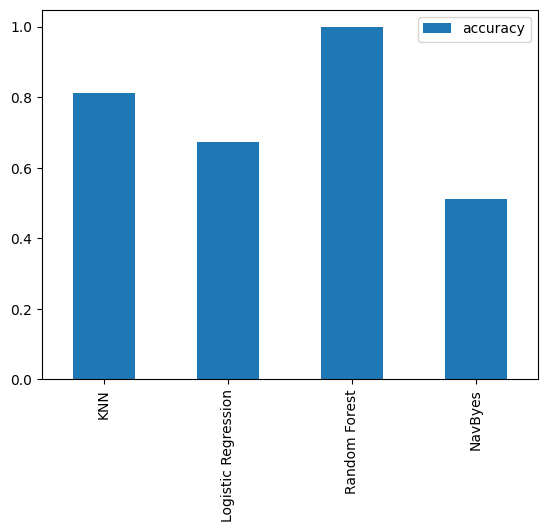

In [55]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [54]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(X_test, y_test))

In [36]:
train_scores

[1.0,
 0.9899780004888781,
 0.9235211439745783,
 0.9278904913224151,
 0.8766194084575898,
 0.8887191395746761,
 0.8540699095575653,
 0.8651002199951112,
 0.8397396724517233,
 0.8427951601075532,
 0.8230567098508922,
 0.8232705939868002,
 0.8074126130530432,
 0.8054265460767539,
 0.7958323148374481,
 0.7932657052065509,
 0.7832131508188707,
 0.7813187484722561,
 0.773221706184307,
 0.7722133952578831]

Here's maximum KNN score on the test data: 89.22%


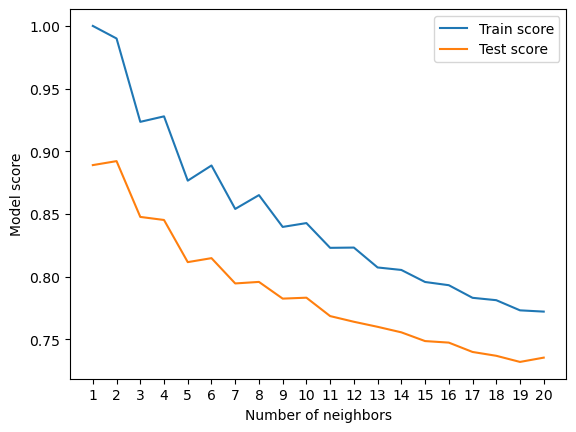

In [37]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Here's maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# Tuning models with RandomizedSearchCV

# Tuning Logistic regression using Randomized Search CV

In [38]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [39]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1438.44988828766}

In [41]:
rs_log_reg.score(X_test, y_test)

0.678807137619164

# Tuning RandomForestClassifier using Randomized Search CV

In [42]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [43]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [44]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.9980444879002689

# Tuning a model with GridSearchCV

In [45]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [46]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 1438.44988828766, 'solver': 'liblinear'}

In [47]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.678807137619164

# Beyond accuracy evaluation of Classification model

In [48]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [49]:
y_preds

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [50]:
y_test

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

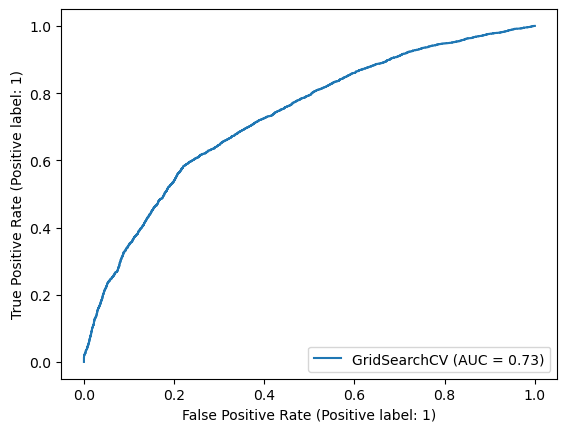

In [51]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

# Confusion matrix

In [52]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[3074  948]
 [1680 2480]]


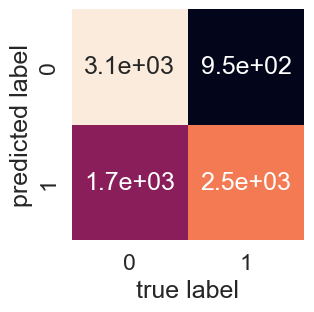

In [53]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

# Classification Report

In [54]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70      4022
           1       0.72      0.60      0.65      4160

    accuracy                           0.68      8182
   macro avg       0.69      0.68      0.68      8182
weighted avg       0.69      0.68      0.68      8182



In [55]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 1438.44988828766, 'solver': 'liblinear'}

In [56]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [57]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.68381814, 0.68210706, 0.66487411, 0.67489611, 0.66964067])

In [58]:
cv_acc = np.mean(cv_acc)
cv_acc

0.6750672207284282

In [59]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.7116732664594124

In [60]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.5887585532746823

In [61]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.6443766716370712

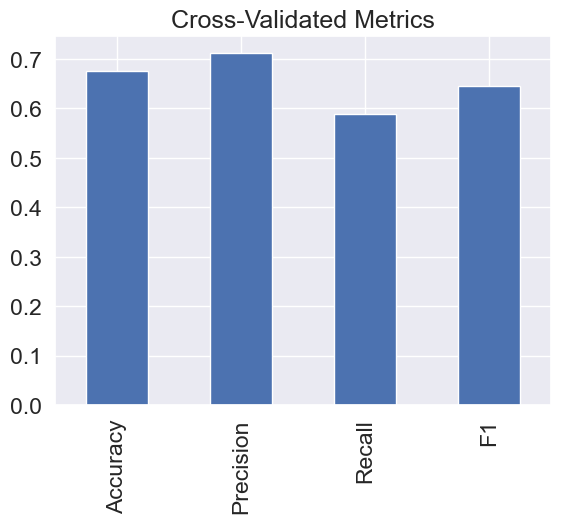

In [62]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

# contribution of features to the model

In [63]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(X_train, y_train);

In [64]:
# Check coef_
clf.coef_

array([[ 4.59717853e-05,  5.22863424e-03,  1.24456245e+00,
         1.15941330e+00,  8.63972191e-01,  6.05813820e-02,
         1.01562376e-01,  7.38373761e-03, -2.36323163e-02,
         1.47777981e-01]])

In [65]:
# Match features to columns
features_dict = dict(zip(fetchdata.columns, list(clf.coef_[0])))
features_dict

{'sex': 4.5971785260558575e-05,
 'age': 0.005228634240289537,
 'hypertension': 1.244562445610318,
 'heart_disease': 1.159413298437955,
 'ever_married': 0.8639721911040498,
 'work_type': 0.060581381987780965,
 'Residence_type': 0.10156237551850898,
 'avg_glucose_level': 0.007383737614978532,
 'bmi': -0.02363231625800019,
 'smoking_status': 0.14777798051164925}

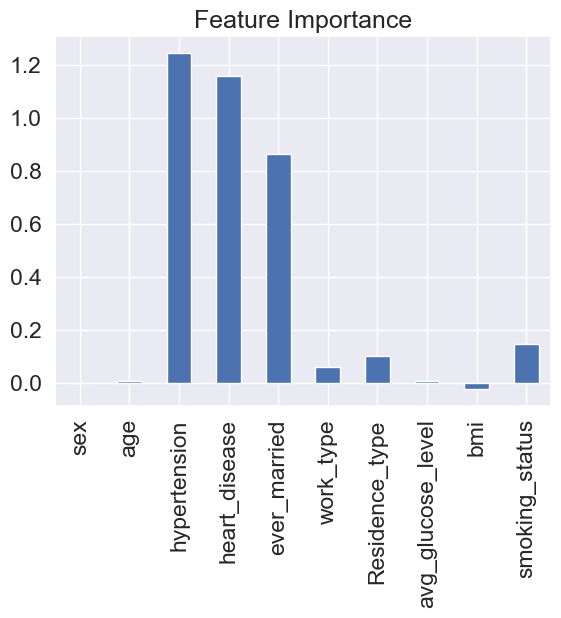

In [66]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

In [67]:
pd.crosstab(fetchdata["sex"], fetchdata["stroke"])

stroke,0,1
sex,,
-99999.0,3,0
0.0,7967,10230
1.0,12480,10230


# Exporting and importing trained model

In [68]:
# Import the dump and load functions from the joblib library
from joblib import dump, load

In [69]:
# Use the dump function to export the trained model to file
dump(knn, "trained-classifier.joblib")

['trained-classifier.joblib']

In [70]:
# Use the load function to import the trained model you just exported
# Save it to a different variable name to the origial trained model
loaded_knn = load("trained-classifier.joblib")

# Evaluate the loaded trained model on the test data
loaded_knn.score(X_test, y_test)

0.7355169885113664

In [71]:
loaded_knn.score(X_train, y_train)

0.7722133952578831